# Extract optimal hyperparameters ($C$, $\gamma$) with cross-validation tests.
Jupyter Notebook for analysing the results of the held-out tests  performed using the file `main_cv_single_real.py` (and optional `run_cv.sh`). 

We performed prediction tasks using cross-validation with 80-20 splits: we use 80% of the data for training the parameters and then measure AUC and accuracy on the remaining 20% test set. Specifically, for the network topology, we hold out 20% of the triples $(\alpha, i, j)$; for the attributes, we hold out 20% of the entries of the categorical vector.  
To improve performance, set `N_real` to a higher number (results were obtained with `N_real=1`). This will slow down the algorithm, but will find a solution with higher loglikelihood (in the training).


In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import results of cross-validation procedure
df = pd.read_csv('../data/output/5-fold_cv/adj_results.csv')
print(f'Shape: {df.shape}')
df.head()

Shape: (45, 10)


,C,gamma,fold,rseed,logL,acc_train,auc_train,logL_test,acc_test,auc_test
0,2,0.3,0,748,-11782.680426,0.758333,0.781345,-2820.592644,0.750000,0.757769
1,2,0.3,1,1131,-11757.778156,0.758333,0.785124,-2850.365154,0.750000,0.750571
2,2,0.3,2,1452,-11607.485077,0.779167,0.787463,-2981.943372,0.666667,0.742051
3,2,0.3,3,1926,-11694.449144,0.745833,0.778799,-2820.611484,0.800000,0.752996
4,2,0.3,4,1969,-11819.378133,0.741667,0.781889,-2748.992755,0.816667,0.762244


In [3]:
# group the results for each pair of (C, gamma), and consider the mean over the K-folds 
groups = df.groupby(by=['C','gamma'])
groups.mean().iloc[:, 2:]

logL  acc_train  auc_train    logL_test  acc_test  auc_test
C gamma                                                                     
2 0.3   -11732.354187   0.756667   0.782924 -2844.501082  0.756667  0.753126
  0.5    -8428.234546   0.756667   0.781621 -2060.305512  0.760000  0.750362
  0.7    -5394.194679   0.730833   0.709526 -1336.954649  0.406667  0.669848
5 0.3   -11264.944162   0.757500   0.831530 -2915.285726  0.743333  0.722198
  0.5    -8090.373720   0.782500   0.829593 -2037.609014  0.710000  0.722336
  0.7    -4916.345713   0.834167   0.819528 -1203.526612  0.730000  0.724836
8 0.3   -10895.304679   0.750833   0.861088 -2902.979417  0.743333  0.685485
  0.5    -7905.564584   0.780833   0.850334 -2016.264981  0.713333  0.696822
  0.7    -4808.438857   0.847500   0.840880 -1172.664468  0.650000  0.699177

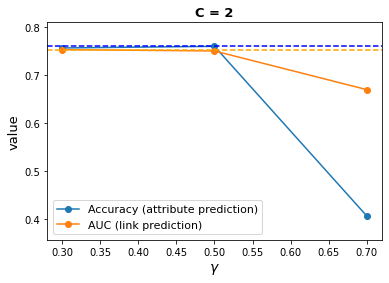

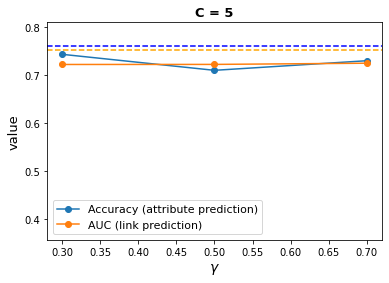

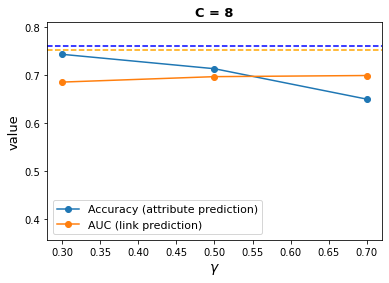

In [4]:
# plot the results (accuracy and auc of the test set) for each number of communities C
label_legend = {'acc_test': 'Accuracy (attribute prediction)', 'auc_test':'AUC (link prediction)'}
colors = {'acc_test':'blue','auc_test':'orange'}
mins = min(np.min(groups.mean()['acc_test']), np.min(groups.mean()['auc_test']))
maxs = max(np.max(groups.mean()['acc_test']), np.max(groups.mean()['auc_test']))

for C in np.unique(df.C):
    fig = plt.figure()
    for measure in ['acc_test', 'auc_test']:
        x = np.unique(df.gamma)
        y = groups.mean().loc[C][measure]
        plt.plot(x, y, marker='o', label=label_legend[measure])
        plt.axhline(y = np.max(groups.mean()[measure]), color=colors[measure], linestyle='--')      
    
    plt.title('C = {0}'.format(C), fontweight="bold", size=13)
    plt.xlabel('$\gamma$', size = 14)
    plt.ylim([mins-.05, maxs+.05])
    plt.ylabel('value', size = 13)
    plt.legend(loc='lower left', fontsize=11)

Our model has two hyperparameters, the scaling parameter $\gamma$ and the number of communities $C$. We estimate them by using 5-fold cross-validation along with grid search to range across their possible values. We then select the combination $(\hat{C},\hat{\gamma})$ that returns the best average performance over the cross-validation runs. Standard cross-validation considers performance in terms of a particular metric. However, here we have two possible ones which are qualitatively different, i.e. AUC and accuracy. Depending on the task at hand, one can define performance as a combination of the two, bearing in mind that the values of $(\hat{C},\hat{\gamma})$ at the maximum of either of them might not coincide. Here we would select $(\hat{C},\hat{\gamma})$ as the values are jointly closer to both the maximum values (dashed lines).

The hyperparameters selection would benefit from an automatized routine, to be incorporated as a pre-step in the main algorithm.